In [1]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import numpy as mp
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as matplot
import seaborn as sborn
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [2]:
data = pd.read_csv(r"C:\Users\azmae\Desktop\365\project\spam.csv",encoding='latin-1')

In [3]:
data.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [4]:
#Dropping columns and clearing dataset
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
#renaming v1 and v2 for better understanding
data = data.rename(columns={"v1":"category", "v2":"sms"})

In [5]:
#counting number of spams and hams
data.category.value_counts()

ham     4825
spam     747
Name: category, dtype: int64

In [6]:
#plotting histogram
data['length'] = data['sms'].apply(len)
data.head()

,category,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:ylabel='Frequency'>

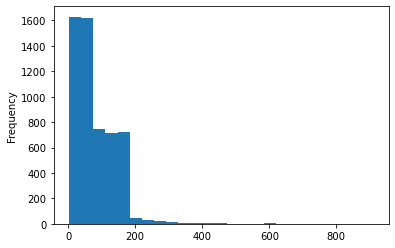

In [7]:

%matplotlib inline
data['length'].plot(bins=25, kind='hist')

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

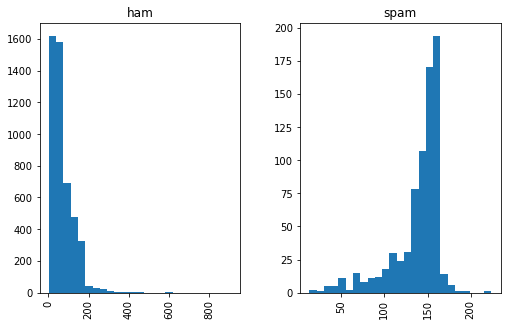

In [8]:
data.hist(column='length', by='category', bins=25,figsize=(8,5))

In [9]:
#displaying most commonly used ham and spam words
#separaating spam and ham messages
df=pd.DataFrame(data)
spamfilter=df.loc[df['category']=='spam']
print(spamfilter)

     category                                                sms  length
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
5        spam  FreeMsg Hey there darling it's been 3 week's n...     148
8        spam  WINNER!! As a valued network customer you have...     158
9        spam  Had your mobile 11 months or more? U R entitle...     154
11       spam  SIX chances to win CASH! From 100 to 20,000 po...     136
...       ...                                                ...     ...
5537     spam  Want explicit SEX in 30 secs? Ring 02073162414...      90
5540     spam  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...     160
5547     spam  Had your contract mobile 11 Mnths? Latest Moto...     160
5566     spam  REMINDER FROM O2: To get 2.50 pounds free call...     147
5567     spam  This is the 2nd time we have tried 2 contact u...     161

[747 rows x 3 columns]


In [10]:
df=pd.DataFrame(data)
hamfilter=df.loc[df['category']=='ham']
print(hamfilter)

     category                                                sms  length
0         ham  Go until jurong point, crazy.. Available only ...     111
1         ham                      Ok lar... Joking wif u oni...      29
3         ham  U dun say so early hor... U c already then say...      49
4         ham  Nah I don't think he goes to usf, he lives aro...      61
6         ham  Even my brother is not like to speak with me. ...      77
...       ...                                                ...     ...
5565      ham                                       Huh y lei...      12
5568      ham              Will Ì_ b going to esplanade fr home?      37
5569      ham  Pity, * was in mood for that. So...any other s...      57
5570      ham  The guy did some bitching but I acted like i'd...     125
5571      ham                         Rofl. Its true to its name      26

[4825 rows x 3 columns]


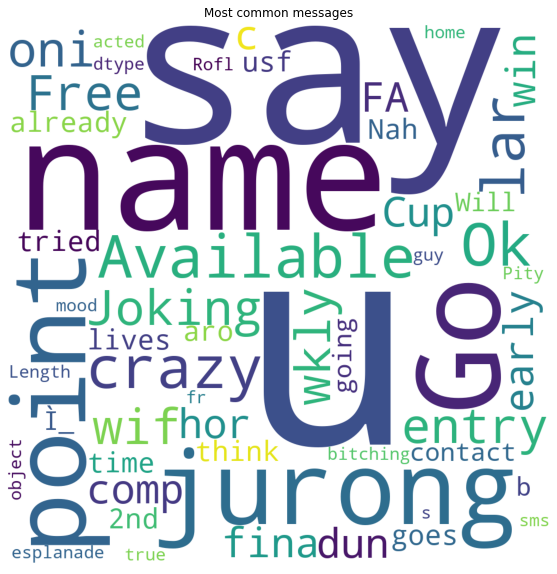

In [11]:
#Displaying all messages in wordcloud
wordcloud=WordCloud(background_color='white',width=1000,height=1000,max_words=500).generate(str(data['sms']))
matplot.rcParams['figure.figsize']=(10,10)
matplot.title('Most common messages')
matplot.axis('off')
matplot.imshow(wordcloud)

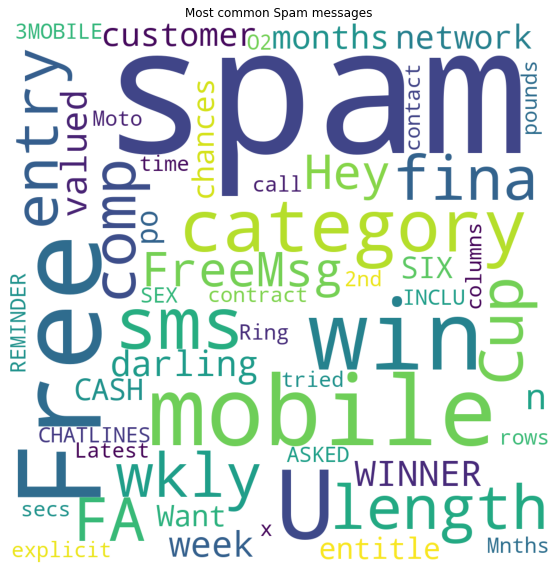

In [12]:
#displaying most commonly used spam words
wordcloud=WordCloud(background_color='white',width=1000,height=1000,max_words=500).generate(str([spamfilter]))
matplot.rcParams['figure.figsize']=(10,10)
matplot.title('Most common Spam messages')
matplot.axis('off')
matplot.imshow(wordcloud)

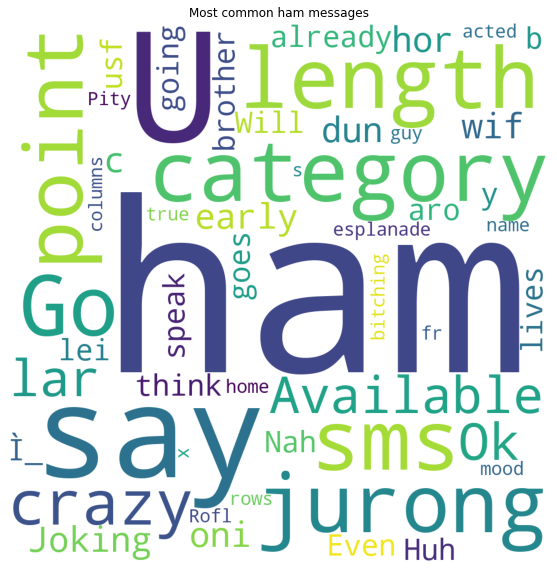

In [13]:
#displaying most commonly used Ham words
wordcloud=WordCloud(background_color='white',width=1000,height=1000,max_words=500).generate(str([hamfilter]))
matplot.rcParams['figure.figsize']=(10,10)
matplot.title('Most common ham messages')
matplot.axis('off')
matplot.imshow(wordcloud)

In [14]:
#implementing CountVectorizer
documents=data['sms']

In [15]:
print(documents)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: sms, Length: 5572, dtype: object


In [16]:
count_vectorizer = CountVectorizer()

In [17]:
#displaying frequency of words
count_vectorizer.fit(documents)
# print(count_vectorizer.vocabulary_)

CountVectorizer()

In [18]:
vectorizer = count_vectorizer.transform(documents)

In [19]:
#transforming into array
print(vectorizer.shape)
varray=vectorizer.toarray()
print(varray)

(5572, 8672)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
varray[3]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
count_vectorizer.inverse_transform(varray[3])

[array(['already', 'dun', 'early', 'hor', 'say', 'so', 'then'],
       dtype='<U34')]

In [22]:
count_vectorizer.get_feature_names()

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '084

In [23]:
#generating frequency matrics for bag of words approach
freq_matrix = pd.DataFrame(varray, columns = count_vectorizer.get_feature_names())
freq_matrix

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#splitting into test train
x_train, x_test, y_train, y_test = train_test_split(data['sms'], 
                                                    data['category'],test_size=0.1, 
                                                    random_state=1)


In [25]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

5014
558
5014
558


In [26]:
# implenting the CountVectorizer method


tr_data = count_vectorizer.fit_transform(x_train)

 
test_data = count_vectorizer.transform(x_test)

In [27]:
print(tr_data)

  (0, 3493)	3
  (0, 1901)	1
  (0, 7390)	1
  (0, 1769)	1
  (0, 6630)	1
  (0, 7951)	1
  (0, 5208)	1
  (1, 7319)	2
  (1, 3355)	2
  (1, 2552)	1
  (1, 5163)	1
  (1, 6889)	1
  (1, 3897)	2
  (1, 1371)	2
  (1, 2554)	1
  (1, 5054)	1
  (1, 6027)	1
  (1, 7370)	1
  (1, 3841)	1
  (1, 5958)	1
  (1, 5450)	1
  (1, 5355)	1
  (1, 7993)	1
  (1, 3596)	1
  (1, 3252)	1
  :	:
  (5011, 5232)	1
  (5011, 7910)	1
  (5011, 5329)	1
  (5011, 4904)	1
  (5011, 2540)	1
  (5011, 7320)	1
  (5011, 3590)	1
  (5011, 3769)	1
  (5011, 1754)	1
  (5011, 4653)	1
  (5011, 3792)	1
  (5011, 5401)	1
  (5012, 2037)	1
  (5012, 5253)	1
  (5012, 3590)	1
  (5012, 4544)	1
  (5012, 3490)	1
  (5012, 4021)	1
  (5012, 6702)	1
  (5012, 5784)	1
  (5012, 7682)	1
  (5013, 8048)	1
  (5013, 4715)	1
  (5013, 1862)	1
  (5013, 6680)	1


In [28]:
print(test_data)

  (0, 2133)	1
  (0, 3674)	1
  (0, 4989)	1
  (0, 6050)	1
  (0, 7403)	1
  (1, 1065)	1
  (1, 2848)	1
  (1, 3404)	1
  (1, 4653)	1
  (1, 7403)	1
  (1, 8264)	1
  (2, 818)	1
  (2, 1018)	1
  (2, 1301)	1
  (2, 1743)	1
  (2, 2009)	1
  (2, 2093)	1
  (2, 4010)	3
  (2, 4989)	1
  (2, 5128)	1
  (2, 5519)	1
  (2, 6103)	1
  (2, 6174)	1
  (2, 6424)	1
  (2, 6755)	1
  :	:
  (556, 5969)	1
  (556, 6414)	1
  (556, 6717)	1
  (556, 6894)	1
  (556, 6917)	1
  (556, 7185)	1
  (556, 7295)	1
  (556, 7403)	2
  (556, 7666)	1
  (556, 7934)	1
  (556, 8092)	1
  (556, 8163)	1
  (556, 8213)	1
  (557, 333)	1
  (557, 563)	1
  (557, 592)	1
  (557, 778)	1
  (557, 1699)	1
  (557, 2339)	1
  (557, 2972)	1
  (557, 3461)	1
  (557, 3659)	1
  (557, 4707)	1
  (557, 7403)	1
  (557, 7471)	1


In [29]:
#implementing Multinomial Naive Bayes
mulnaive_bayes = MultinomialNB()
mulnaive_bayes.fit(tr_data,y_train)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
y_pred = mulnaive_bayes.predict(test_data)

In [30]:
#Displaying Accuracy Score 
accscore = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Multinomial Naive Bayes: ", round(accscore, 1), "%") 

Accuracy using Multinomial Naive Bayes:  98.2 %


In [31]:
#displaying Precision Score (%) considering ham being the positive label
prescore = precision_score(y_test, y_pred,pos_label='ham') *100
print("Precision using Multinomial Naive Bayes: ", round(prescore, 1), "%") 

Precision using Multinomial Naive Bayes:  98.6 %


In [32]:
#displaying Recall Score (%) considering ham being the positive label
rescore = recall_score(y_test, y_pred,pos_label='ham') *100 
print("Recall score using Multinomial Naive Bayes: ", round(rescore, 1), "%") 

Recall score using Multinomial Naive Bayes:  99.4 %


In [33]:
#displaying f1 Score (%) considering ham being the positive label
fscore = f1_score(y_test, y_pred,pos_label='ham') *100
print("f1 score using Multinomial Naive Bayes: ", round(fscore, 1), "%") 

f1 score using Multinomial Naive Bayes:  99.0 %
